# CS 237 Fall 2019   Homework Five

### Due date: PDF file due Thursday October 10th @ 11:59PM in GradeScope with 6-hour grace period

### Late deadline:  If submitted up to 24 hours late, you will receive a 10% penalty (with same 6 hours grace period)

### General Instructions

Please complete this notebook by filling in solutions where indicated. Be sure to "Run All" from the Cell menu before submitting. 

There are two sections to the homework: problems 1 - 8 are analytical problems about last
week's material, and the remaining problems are coding problems which will be discussed in lab next week. 


In [33]:
# Here are some imports which will be used in code that we write for CS 237
 

# Imports potentially used for this lab


import matplotlib.pyplot as plt   # normal plotting
import numpy as np
import math

#from math import log, pi, sqrt       # import whatever you want from math

from random import seed, random
from scipy.misc import comb
from collections import Counter

%matplotlib inline

# Calculating permutations and combinations efficiently

def P(N,K):
    res = 1
    for i in range(K):
        res *= N
        N = N - 1
    return res
           
def C(N,K):    
    return comb(N,K,True)     # just a wrapper around the scipy function


# Useful code 

def show_distribution(outcomes, title='Probability Distribution'):
    num_trials = len(outcomes)
    X = range( int(min(outcomes)), int(max(outcomes))+1 )
    freqs = Counter(outcomes)
    Y = [freqs[i]/num_trials for i in X]
    plt.bar(X,Y,width=1.0,edgecolor='black')
    if (X[-1] - X[0] < 30):
        ticks = range(X[0],X[-1]+1)
        plt.xticks(ticks, ticks) 
    plt.xlabel("Outcomes")
    plt.ylabel("Probability")
    plt.title(title)
    plt.show()

# This function takes a list of outcomes and a list of probabilities and
# draws a chart of the probability distribution.

def draw_distribution(Rx, fx, title='Probability Distribution for X'):
    plt.bar(Rx,fx,width=1.0,edgecolor='black')
    plt.ylabel("Probability")
    plt.xlabel("Outcomes")
    if (Rx[-1] - Rx[0] < 30):
        ticks = range(Rx[0],Rx[-1]+1)
        plt.xticks(ticks, ticks)  
    plt.title(title)
    plt.show()
    
def round4(x):
    return round(x+0.00000000001,4)

def round4_list(L):
    return [ round4(x) for x in L]


## Analytical Problem Instructions

Some of the following problems ask you to "describe" a random variable, which means:

> (i)   Give $R_X$ (you may schematize it if it is very complicated or infinite);<br>
> (ii)  List out the values of $f_X$ corresponding to each element of $R_X$; <br>
> (iii)  Draw a probability distribution, using the function <code>draw_distribution</code> provided in the previous cell. <br>
> (iv) Give $E(X)$; <br>
> (v)  Give $Var(X)$ and $\sigma_X$. <br>

As always, round to 4 decimal places <strong>at the last stage</strong>, using the functions <code>round4(...)</code> and <code>round4_list(...)</code> given above.

A nice way to approach these is to do any complicated calculations in Python and then if you have
to change something you won't have to redo all the calculations. Plus, you will make fewer
mistakes in calculation. However, there is no need to do this for simpler problems. 

I also **strongly** recommend creating new variables for each problem, for example Rx1, Rx2, etc. for
the range of the random variable in problems 1, 2, etc.   That way, you won't have problems if you
forget and use the wrong variable! You can also refer to previous results without problems. 

Following Problem One is an example of what I mean (it is a simple problem, but I am showing you
how you could approach it). 

You are not **required** to do it this way, but I *encourage* you to do something similar. 

## Example Problem


*Describe* the random variable X = "the number of heads showing on 2 flipped fair coins"


Solution:

(i)   Rx = [0, 1, 2]
(ii)  fx = [0.25, 0.5, 0.25]
(iii)


C:\Users\Rashid\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.


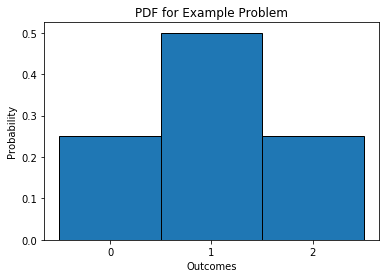

(b)   E(X) = 1.0
(c)   Var(X) = 0.5
      sigma_X = 0.7071


In [36]:
Rx0 = list(range(3))

def f0(k):                        # if you write f as a Python function, then you can create the list
    return  C(2,k)/4              # fx by using a list comprehension, as shown here:
    
fx0 = [ f0(k) for k in Rx0 ]

print("Solution:\n")
print("(i)   Rx =",Rx0)
print("(ii)  fx =",round4_list(fx0))             # in case you get complicated decimals, round to 4 places
print("(iii)")

draw_distribution( Rx0, fx0, title='PDF for Example Problem')

(E0,V0,s0) = stats(Rx0,fx0)         # uses function you will write in Problem 1

print("(b)   E(X) =",round4(E0))
print("(c)   Var(X) = " + str(round4(V0)))
print("      sigma_X = " + str(round4(s0)))


## Problem One

In order to understand how to calculate these statistical measures we have been learning
this week, you will write a function which will return the most important measures,
and since these involve very similar kinds of computations, to avoid extra work, we will
return this as a triple (expected-value,variance,standard deviation).

Complete the following function stub, and demonstrate it on the random variable $X$ from the sample problem. 


[Optional, but a great idea: Write a function PrintSolution(...) which prints out all the answers as shown in the Example Problem!]

In [35]:
# Function to compute most common one-number measures for X
def stats(Rx,fx):
    outcomes = [(Rx[i] * fx[i]) for i in range(len(Rx))]
    expected_Value = sum(outcomes)
    var = [((Rx[i]**2) * fx[i]) for i in range(len(Rx))]
    varia = sum(var)
    variance = varia - (expected_Value**2)
    
    standard_Deviation = np.sqrt(variance)
    
    return(expected_Value, variance, standard_Deviation)
    
def printSolution(Rx0, fx0, E0, V0, s0):
    print("Solution:\n")
    print("(i)   Rx =",Rx0)
    print("(ii)  fx =",round4_list(fx0))             # in case you get complicated decimals, round to 4 places
    print("(iii)")

    draw_distribution( Rx0, fx0, title='PDF for the Problem')

    (E0,V0,s0) = stats(Rx0,fx0)         # uses function you will write in Problem 1

    print("(iv)  E(X) =",round4(E0))
    print("(v)   Var(X) = " + str(round4(V0)))
    print("      sigma_X = " + str(round4(s0)))


(E1,V1,s1) = stats(Rx0,fx0)

print("Solution:\n")
print("E(X) =",E1,"  Var(X) =",V1, "  sigma(X) =", round4(s1))

Solution:

E(X) = 1.0   Var(X) = 0.5   sigma(X) = 0.7071


## Problem Two

Suppose you deal a 5-card hand from a standard deck which has been shuffled well. 

Let $X$ = "The number of Spades occurring in the hand." 

*Describe* the random variable $X$. 

Solution:

(i)   Rx = [0, 1, 2, 3, 4, 5]
(ii)  fx = [0.2215, 0.4114, 0.2743, 0.0815, 0.0107, 0.0005]
(iii)


C:\Users\Rashid\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.


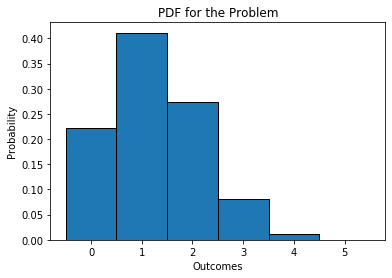

(iv)  E(X) = 1.25
(v)   Var(X) = 0.864
      sigma_X = 0.9295


In [37]:
Rx2 = list(range(6))           # your code here



def f2(k):
    result = (C(13,k)*C(39,(5-k)))/ C(52,5)
    return result
        
fx2 = [f2(k) for k in Rx2]           # your code here


(E2,V2,s2) = stats(Rx2,fx2)

printSolution(Rx2, fx2, E2, V2,s2)

## Problem Three

We refer to the random variable $X$ from Problem Two. 

<i>Describe</i> the random variable $Y = 2X + X - 1$


Hint: when more than one instance of a random variable is involved, it is often useful to draw a matrix of all possibilities.  Consider the two random variables $2X$ and $(X-1)$ and draw a matrix of each of the two RVs and their sum; since these two RVs are independent, you can calculate the probabilities by multiplication, as shown in class. 
Or just put $X$ on each axis and calculate $2X + X - 1$ in the cells. 


# incorrect 
R(2x)  = {0,2,4,6,8,10}

R(X-1) = {-1,0,1,2,3,4}

R(Y) = {-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14}

P(Y = -1) = 0.75 * 0.75 = 0.525    (prob y = prob x * prob x .2 for loops to check for the value)

P(Y = 0) = 0.75 * 0.25 = 0.1875

P(Y = 1) = 0.75 * 0.0588 + 0.25 * 0.75 = 0.2316

P(Y = 2) = 0.75 * 0.0129 + 0.25 * 0.25 = 0.072175

P(Y = 3) = 0.75 * 0.0026 + 0.25 * 0.0588 + 0.0588 * 0.75 = 0.06075

P(Y = 4) = 0.75 * 0.0005 + 0.25 * 0.0129 + 0.0588 * 0.25 = 0.0183

P(Y = 5) = 0.25 * 0.0026 + 0.0588 * 0.0588 + 0.0129 * 0.75 = 0.01378244

P(Y = 6) = 0.25 * 0.0005 + 0.0588 * 0.0129 + 0.0129 * 0.25 = 0.00410852

P(Y = 7) = 0.0588 * 0.0026 + 0.0129 * 0.0588 + 0.0026 * 0.75 = 0.0028614

P(Y = 8) = 0.0588 * 0.0005 + 0.0129 * 0.0129 + 0.0026 * 0.25 = 0.00084581

P(Y = 9) = 0.0129 * 0.0026 + 0.0026 * 0.0588 + 0.0005 * 0.75 = 0.00056142

P(Y = 10) = 0.0129 * 0.0005 + 0.0026 * 0.0129 + 0.0005 * 0.25 = 0.00016499

P(Y = 11) = 0.0026 * 0.0026 + 0.0005 * 0.0588 = 0.00003616

P(Y = 12) = 0.0026 * 0.0005 + 0.0005 * 0.0129 = 7.75*^-6

P(Y = 13) = 0.0005 * 0.0026 = 1.3*^-6

P(Y = 14) = 0.0005 * 0.0005 = 2.5*^-7





1.0
Solution:

(i)   Rx = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
(ii)  fx = [0.0491, 0.0911, 0.1519, 0.1873, 0.176, 0.1465, 0.0977, 0.0561, 0.0277, 0.0112, 0.0039, 0.0011, 0.0003, 0.0, 0.0, 0.0]
(iii)


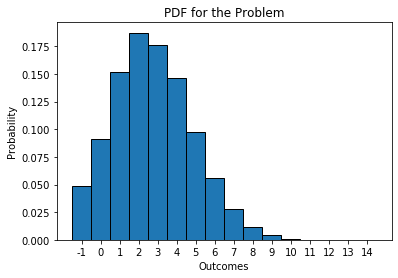

(iv)  E(X) = 2.75
(v)   Var(X) = 4.3199
      sigma_X = 2.0784


In [38]:

Rx3 = [-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]           # your code here
fx3 = []

PNegOne = fx2[0]*fx2[0]
P0 = fx2[0]*fx2[1]
P1 = (fx2[1]*fx2[0])+(fx2[0]*fx2[2])
P2 = (fx2[1]*fx2[1])+(fx2[0]*fx2[3])
P3 = (fx2[2]*fx2[0])+(fx2[1]*fx2[2])+(fx2[0]*fx2[4])
P4 = (fx2[2]*fx2[1])+(fx2[1]*fx2[3])+(fx2[0]*fx2[5])
P5 = (fx2[2]*fx2[2])+(fx2[3]*fx2[0])+(fx2[1]*fx2[4])
P6 = (fx2[3]*fx2[1])+(fx2[2]*fx2[3])+(fx2[1]*fx2[5])
P7 = (fx2[4]*fx2[0])+(fx2[3]*fx2[2])+(fx2[2]*fx2[4])
P8 = (fx2[4]*fx2[1])+(fx2[3]*fx2[3])+(fx2[2]*fx2[5])
P9 = (fx2[5]*fx2[0])+(fx2[4]*fx2[2])+(fx2[3]*fx2[4])
P10 = (fx2[5]*fx2[1])+(fx2[4]*fx2[3])+(fx2[3]*fx2[5])
P11 = (fx2[5]*fx2[2])+(fx2[4]*fx2[4])
P12 = (fx2[5]*fx2[3])+(fx2[4]*fx2[5])
P13 = fx2[5]*fx2[4]
P14 = fx2[5]*fx2[5]

fx3.append(PNegOne)           # your code here
fx3.append(P0)
fx3.append(P1)
fx3.append(P2)
fx3.append(P3)
fx3.append(P4)
fx3.append(P5)
fx3.append(P6)
fx3.append(P7)
fx3.append(P8)
fx3.append(P9)
fx3.append(P10)
fx3.append(P11)
fx3.append(P12)
fx3.append(P13)
fx3.append(P14)

(E3,V3,s3) = stats(Rx3,fx3)

r= sum(fx3)
print(r)

printSolution(Rx3, fx3, E3,V3,s3)



## Problem Four

Suppose we have a sack with $2$ red balls and $2$ black balls, and 
we draw balls <i> without replacement </i> until 
the **second red** ball is drawn.  

<i>Describe</i> the random variable $X$ = "the number of balls drawn". 
 

Solution:

(i)   Rx = [2, 3, 4]
(ii)  fx = [0.1667, 0.3333, 0.5]
(iii)


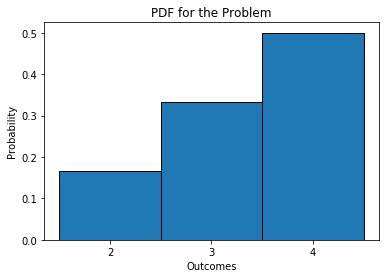

(iv)  E(X) = 3.3333
(v)   Var(X) = 0.5556
      sigma_X = 0.7454


In [39]:
# P(R2) is 2 out of 6 different combinations of drawing a red ball
# P(R3) is 4 out of 6 different combinations of drawing a red ball

#R2 = 2/4 * 1/3 + 2/4 * 1/3 
R2 = 1/2 * 1/3 # 1/6
R3 = 2/4 * 2/3 * 1/2 + 2/4 * 2/3 * 1/2 # 2/6
R4 = 3/6 #3/6

Rx4 = [2,3,4]
fx4 = [R2,R3,R4]

(E4,V4,s4) = stats(Rx4,fx4)

printSolution(Rx4, fx4, E4, V4, s4)

#print("Solution:")


## Problem Five

A sack contains five balls, two of which are marked \$1, two \$5, and one \$15. One round of the game is played as follows: You pay me $10 to select two balls at random (without replacement) from the urn, at which point I pay you the sum of the amounts marked on the two balls. </p>

(a) *Describe* the random variable X = "the **net payout** in each round."

(b) Is this a fair game? Be precise and show all work.

(c) If your answer to (b) is &quot;no,&quot; what should I charge for each turn to make it a fair game?


<strong> Solution:</strong>  

Solution:

(i)   Rx = [-8, -4, 0, 6, 10]
(ii)  fx = [0.1, 0.4, 0.1, 0.2, 0.2]
(iii)


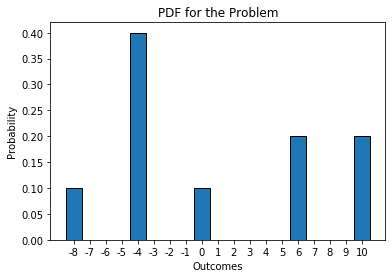

(iv)  E(X) = 0.8
(v)   Var(X) = 39.36
      sigma_X = 6.2738
(a)



In [40]:
# Rx5    = [(1,1),(1,5),(1,15),(5,1),(5,5),(5,15),(15,1),(15,5)]
# fx5    = [(2/5*1/4),(2/5*2/4),(2/5*1/4),(2/5*2/4),(2/5*1/4),(2/5*1/4),(1/5*2/4),(1/5*2/4) ]


#Rx5 = [2,6,10,16,20] # 1(2), 2(6), 1(10), 2(16), 2(20)
#fx5 = [1/10,2/5,1/10,1/5,1/5]

Rx5 = [-8,-4,0,6,10] # 1(-8) 2(-4) 1(0) 2(6) 2(10)
fx5 = [1/10,2/5,1/10,1/5,1/5]

(E5,V5,s5) = stats(Rx5,fx5)

printSolution(Rx5,fx5,E5,V5,s5)

print("(a)\n")



(b) Our E(X) is $0.8$. This means on average I would be making 0.80 cents for each game I play. I would personally play this game(however it is not fair). 
  
(c) To make this game fair, you need to add the $0.80$C to the entry fee($10$). In other words, charge $10.80$$ for a game.

## Problem Six

Suppose you are playing a game with a friend in which you bet $n$ dollars on the flip of a fair coin: if the coin lands tails you lose your $n$ dollar bet, but if it lands heads, you get $2n$ dollars back (i.e., you get your $n$ dollars back plus you win $n$ dollars). 

Let $X$ = "the amount you gain or lose." 

(a) What is the expected return $E(X)$ on this game? (Give your answer in terms of $n$.)

Now, after losing a bunch of times, suppose you decide to improve your chances with the following strategy: you will start by betting $\$1$, and if you lose, you will double your bet the next time, and you will keep playing until you win (the coin has to land heads sometime!).

Let $Y$ = "the amount you gain or lose with this strategy". 

(b) What is the expected return $E(Y)$ with this strategy? (Hint: think about what happens for each of the cases of $k = 1, 2, 3, \ldots$ flips). 

(c) Hm ... do you see any problem with this strategy? How much money would you have to start with to guarantee that you always win?  

(d) Suppose when you apply this strategy, you start with $\$20$ and you quit the game when you run out of money. Now what is $E(Y)$?



<strong>Solution:</strong>

a) R(X) = {-∞,.....,-8,-4,-2,-1,1,2,4,8,16,32,....,∞} in other words R(X) = {-n,n}

f(X) = {0.5,0.5}

E(X) = (-n * 0.5) + (n * 0.5) = 0

b) 1 * 1/2 + 1 * 1/4 * 1*1/8+.. = 1$

E(Y) = 1$

c) The problem is that you would need infinite amount of money to guarantee an average win of 1.0.

d) The problem is that if you start with 20 dollars, you cannot double your bet after 4 loses because 1 + 2 + 4 + 8 = 15. You cannot bet 16$ 

1 * 7/8 - 15 * 1/8 = -1$


## Problem Seven

Mr. Smith owns two appliance stores. In store A the number of TV sets sold by a salesperson is, on average, 13 per week with a standard deviation of 5. In store B the number of TV sets sold by a salesperson is, on average, 7 with a standard deviation of 4. Mr. Smith has a position open for a person to sell TV sets. There are two applicants. Mr. Smith asks one of them to work in store A and the other in store B, each for one week. The salesperson in store A sold 10 sets, and the salesperson in store B sold 6 sets. 

Mr. Smith realizes that Store A typically has more customers and typically sells more TVs than Store B, so
it would not be fair to simply compare the raw data.  What he needs to do is "level the playing field" by
comparing the two *after* adjusting for the differences between the two stores. 

(a) Based on this information, which person should Mr. Smith hire?

(b) Suppose the person not hired asks Mr. Smith "Well, how many would I have had to sell to be exactly as good as the person you hired?"  What should Mr. Smith say? (Not quite realistic, because the answer may not be an integer, but just give the floating point value.)

Hint: Use standardized random varibles. 


<strong>Solution:</strong>

a) 

A = (10-13)/5 = -3/5 = -0.6

B = (6-7)/4 = -1/4 = -0.25

This means salesperson in store A sold 0.6 s.d. below the average and salesperson in store B sold 0.25 s.d. below the mean. Therefore Mr.Smith should hire salesperson in store B.

b)

(x - 13)/5 = -0.25 => x - 13 = -1.25 => x = 13 - 1.25 => x = 11.75 or roughly 12 TVs(because you can't physically sell 11.75 TVs)


## Problem Eight

Wayne is interested in two games, Keno and Bolita. To play Bolita, he buys a ticket for \$1 marked with a number 1 .. 100, and one ball is drawn randomly from a collection marked with the numbers 1, ..., 100. If his ticket number matches the number on the drawn ball, he wins \$75; otherwise he gets nothing and loses his \$1 bet. To play Keno, he buys a ticket marked with the numbers 1 .. 4 and there are only 4 balls, marked 1, ..., 4; again he wins if the ticket matches the ball drawn; if he wins he gets \$3; otherwise he again gets nothing and loses his bet. 

(a) What is the expected payout (expected value of net profit after buying ticket and possibly winning something) for each of these games?

(b) What is the variance and standard deviation for each of these games?

(c) If he decides to play one (and only one) of these games for a very long time, which one should he choose?  If he decides to try one of these games for a couple of times, just for fun, which one should he choose?



<strong>Solution:</strong> 

a) The expected payout is -25C for both of these games

b)

Var(Bolita) = 55.6875, standarDev(Bolita) = 7.4624

Var(Keno) = 1.6875, standardDev(Keno) = 1.2290

c)Playing for a very long time does not matter because expected payout is -25c for both of these games.

For a short time, Kano is a better game, because there is more chance of getting your payouts faster.



## Lab Instructions

In homework 2, problem 11, we investigated how to generate random values (called "random variates" in the literature). In this lab, we will make this more explicit by considering three different ways for simulating a random variable:

   > 1. By simulating the original physical experiment;
   > 2. By inverting the CDF; and
   > 3. By using an explicit formula.

In the last two, we will convert a random variate in the range $[0..1)$ created by
the function <code>random()</code> into a random variate from a different distribution.  



## Problem Nine: Generating a Binomial Distribution by Simulation

For this problem, complete the function stub to simulate the
following random variable:  Suppose we have a (possibly) unfair coin where
the probability of Head is $p$ and we flip this coin $N$ times. Let $X$ = "the number of heads showing." 

Demonstrate your solution by generating $10^5$ random variates for the parameters shown and displaying them using <code>show_distribution(...)</code>.

Demonstration:


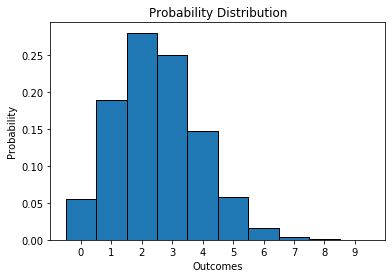

In [6]:
# First, create a function which simulates the coin, where
# you return 1 with probability p and 0 with probability 1-p. 


N = 10
p = 0.25


def coinFlip(p):
    result = random()
    if (result <= p):
        return(1)
    else:
        return(0)
    #result = result * p     # 1(p) or 0

    
def coinFlips(N,p):
    trial = 0
    for i in range(N):
        a = coinFlip(p)
        if(a == 1 ): 
            trial +=1
        else:
            pass
    return trial # run coinflip n times and return between 0 and N

print("Demonstration:")

seed(0)

# coinflips is random v and we run it 10^5

b = [coinFlips(N,p) for i in range(10**5)]

#(E9,V9,s9) = stats(Rx9,fx9)
#printSolution(Rx9,fx9,E9,V9,s9)

# create a list with 10^5 elements and each index should coinflips

show_distribution(b)


## Problem Ten: Generating a Distribution by Inverting the CDF

In this problem we will investigate how to implement a random variable given by an arbitary probability distribution function. First, however, you need to know about the CDF, the Cumulative Distribution Function, which is a simple but crucially important idea, which you can understand by looking at the last slide on Lecture 8 (which I did not cover in lecture) or <a href="https://www.probabilitycourse.com/chapter3/3_2_1_cdf.php">here</a>. Please look at this before continuing with the lab. 

The basic idea in these problems is that we can essentially "invert" the CDF to obtain a function from a random variate in the range $[0..1)$ into  a random variable from the given distribution. 


### TODO, Part (a): Calculating the Cumulative Distribution Function

Complete the following to calculate $F_X$ for the CDF of the probability distribution $f_X$, and then 
demonstrate your code by calculating and displaying the CDF for the random variable of $X$ 
from the Example Problem. 


In [41]:
# example code below
def CDF(fx):
    C = [0]
    C = [0] * len(fx)        # Your code here
    C[0] = fx[0]
    for i in range(1,len(C)):
        C[i] = fx[i] + C[i-1]

    # just in case
    C[-1] = 1.0
    return C 

# Your code here

### Part (b): Generating random variates by inverting the CDF

The basic idea here is that the CDF is a function from outcomes to probabilities:

$$F_X\,:\,R_X\rightarrow [0..1)$$

if we invert this function, we get
a function from the interval $[0..1)$ into the outcomes:

$$F^{-1}_X\, : \,[0..1)\rightarrow R_X$$ 

The algorithm for doing this is actually very simple: just generate a random value $a$ in the range $[0..1)$ and look for the first bin which is greater than $a$; output the corresponding outcome.

The next cell contains a demonstration of this idea: run the cell a few times to see where the random value ends up: the first bin that the red line intersects going left to right indicates the outcome that is output. Be sure you understand how this process works, and what number would be output, for each test. 

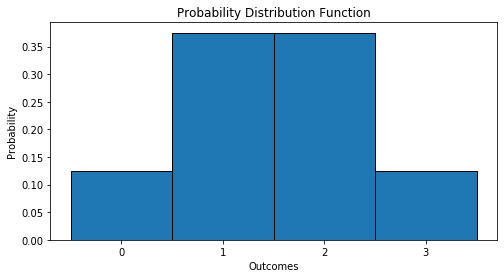

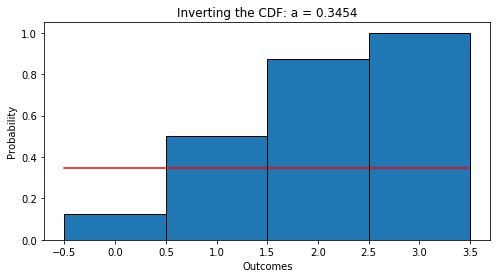

In [8]:
Rx10b = [0,1,2,3]
fx10b = [1/8,3/8,3/8,1/8]
Fx10b = [1/8,4/8,7/8,1.0]
plt.figure(figsize=(8, 4))
plt.bar(Rx10b,fx10b,width=1.0,edgecolor='black')
plt.ylabel("Probability")
plt.xlabel("Outcomes")
if (Rx10b[-1] - Rx10b[0] < 30):
    ticks = range(Rx10b[0],Rx10b[-1]+1)
    plt.xticks(ticks, ticks)  
plt.title("Probability Distribution Function")
plt.show()
    
plt.figure(figsize=(8, 4))
plt.bar(Rx10b,Fx10b,width=1.0,edgecolor='black')
a = random()
plt.plot([-0.5,3.5],[a,a],color="red")
plt.ylabel("Probability")
plt.xlabel("Outcomes") 
plt.title("Inverting the CDF: a = " + str(round4(a)))
plt.show()

### TODO for 10 (b):

Complete the following code template to generate random variates for
a given random variable (represented by Rx and fx), using the code from Part (a). 

Demonstrate your code by generating $10^5$ variates from the random variable $X$ from Problem Two and display it using <code>draw_distribution(...)</code>. 

Hint: Compare with the theoretical distribution from Problem Two.  They should be very close! 

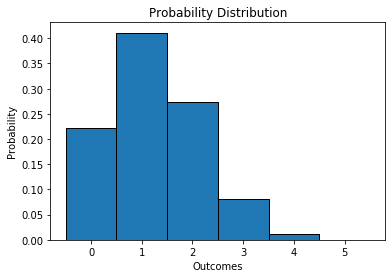

In [42]:
def rvs(Rx,fx):
    u = random() # between 0 and 1
    c = CDF(fx)
    
    for i in range(len(c)):
        if(u <= c[i]):
            return(Rx[i])
        
    
    return 0     # Just to get it to compile
    
    # simulate a coin flip and compare it with cdf
    
seed(0)

num_trials = 10**5

# Your code here

Rx11 = [rvs(Rx2,fx2) for i in range(num_trials)]
show_distribution(Rx11)

#Rx = [1,2,3,4]
#fx = [0.2,0.1,0.6,0.1]
#rvs(Rx,fx)

## Problem Eleven:  Creating Random Variates for Standard Distributions by Inverting the CDF

Now we will apply the technique from the last problem to generate random variates for two common distributions, which we will study in detail this week, however, we have already seen them many times; both of them involve a (possibly) unfair coin, where the probability of Head is p (and the probability of Tails is thus 1 - p): 

   >  Binomial  B(N,p):    This is just the number of heads showing on N flipped coins, where the probability of heads is p (and the probability of Tails is thus 1-p). 
   
   >  Geometric  G(p):     This is the number of flips you make until the first Head appears on a coin whose probability of Head is p. 

### Part (a) Binomial Variates
 
Display the result of generating $10^5$ random variates from the Binomial
Distribution with $N=8$ and $p=0.8$ using <code>show_distribution</code>.  

Hint:  You may look at the Distributions Notebook on the class web site to see the
formula for the PDF for the Binomial, or wait until lecture....


C:\Users\Rashid\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.


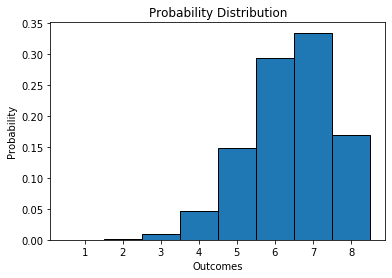

Solution:


In [43]:
# Now generate the empirical distribution

N = 8
p = 0.8

num_trials = 10**5

def Bino(N,p,k): # k amount of heads
    a = (C(N,k) * (p**k)) * ((1-p)**(N-k)) # prob of getting k heads
    return a
    

#z = rvs(Bino(N, ))

RxB = range(N+1)

fxB = [Bino(N,p,k) for k  in RxB]

#a = Bino(N,p,rvs(RxB,fxB))

answer = [rvs(RxB,fxB) for i in range(num_trials)]

show_distribution(answer)

print("Solution:")


### Part (b) Geometric Variates 

Although $R_x$ is infinite, we will only approximate this distribution by considering the first 20 outcomes. 
This will potentially create an error, since of course it is possible for the value produce to be larger than 20, however, the probability is so small we will not worry about it. Note that our code for the CDF did not
calculate the last bin, but simply set it to 1.0, which will make sure our generation of random variates does not crash. 

Display the experimental distribution for the Geometric Distribution with $p=0.6$, using <code>show_distribution</code> from the beginning of the notebook, for $10^5$ trials and the given N and p.  

Hint:  You may look at the Distributions Notebook on the class web site to see the
formula for the PDF for the Geometric, or wait until lecture....


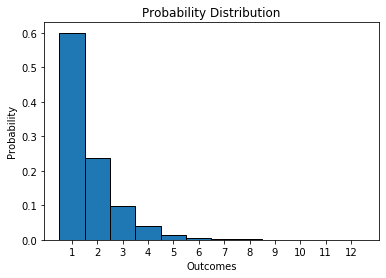

In [44]:
# Solution

limit = 20
p = 0.6 

def geo(p,k):
    g = ((1-p)**(k-1)) * p
    return (g)

Rx11b = [i for i in range(1,limit+1)]

fx11b =  [geo(p,i) for i in Rx11b]

# Test it!

num_trials = 10**5

seed(0)             # this is from the random library, to make sure student answers are consistent with my solution

answer1 = [rvs(Rx11b,fx11b) for i in range(num_trials)]

show_distribution(answer1)

##  Problem Twelve: Generating the Geometric Distribution by Explicit Formula

Now we will explore using an explicit function for the inverse of the CDF. This is not possible for all distributions, but when it is, it the simplest (and most efficient) method.  

The following formula is from <a href="https://en.wikipedia.org/wiki/Geometric_distribution">Wikipedia</a>: if U is a random variable uniformly distributed in the range [0..1), then

$$    1 + \lfloor \,\ln{( U )} \, \,/ \, \ln{( 1 - p )}  \,\rfloor$$            
          
is an integer which is distributed according to the Geometric Distribution with probability p.

Note: $\ln$ is log to the base $e$ (just <code>log(...)</code> in Python). 


For this problem, simply complete the following function stub and demonstrate it as shown. 


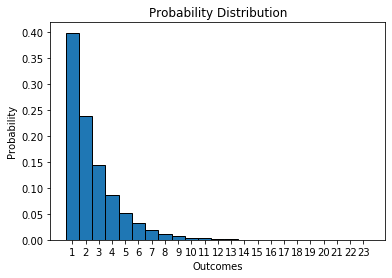

In [45]:
from math import log
u = np.random.uniform(0,1)

p = 0.4 

num_trials = 10**5

#Rx11b = [i for i in range(1,limit+1)]

#fx11b =  [(1 + (math.floor(log(u)/ log(1-p)))) for i in Rx11b]

seed(0)  # this is from the random library, to make sure student answers are consistent with my solution

answer1 = [1 + (math.floor(log(random())/ log(1-p))) for i in range(num_trials)]

show_distribution(answer1)